In [1]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import random
import numpy as np

model = load_model("./EMNIST.h5")
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
____

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnistdata/", reshape=False)
x_test, y_test             = mnist.test.images, mnist.test.labels
assert(len(x_test) == len(y_test))
# X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
n_classes = 10 
print("Test Set:       {} samples".format(len(x_test)))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnistdata/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnistdata/train-labels-idx1-ubyte.gz
Extracting mnistdata/t10k-images-idx3-ubyte.gz
Extracting mnistdata/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Test Set:       10000 samples


In [3]:
# number of classes
# num_classes = y_test.nunique()
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test, 62)

Using TensorFlow backend.


In [4]:
print("y_test: ", y_test.shape)

y_test:  (10000, 62)


In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2923418946027756
Test accuracy: 0.8944


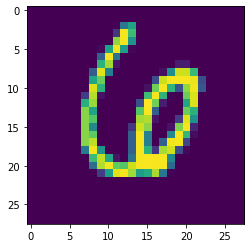

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
plt.imshow(x_test[66].squeeze())
plt.show()
print(y_test[44])

In [24]:
print(x_test.shape)

(10000, 28, 28, 1)


In [25]:
image = x_test[66]
image = image.reshape(1,28,28,1)
print(image.shape)

(1, 28, 28, 1)


In [26]:
classIndex = int(model.predict_classes(image))
predictions = model.predict(image)
probVal= np.amax(predictions)
print(classIndex,probVal)

6 0.9940824


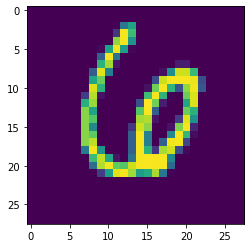

In [27]:
plt.imshow(x_test[66].squeeze())
plt.show()

In [19]:
print(y_test[classIndex])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


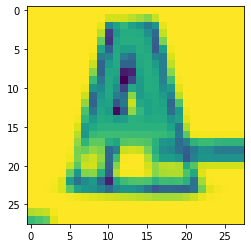

(1, 28, 28, 1)


In [39]:
# import cv2
# img1 = cv2.imread('./e_28_28.png')
HEIGHT = 28
WIDTH = 28
import skimage.io as io
from skimage.transform import resize

img1 = io.imread('./a_28_28.jpg', as_gray=True)
img1 = resize(img1, (WIDTH, HEIGHT), anti_aliasing=True)
plt.imshow(img1)
plt.show()
img1 = img1.reshape(1,28,28,1)
print(img1.shape)

In [40]:
classIndex = int(model.predict_classes(img1))
predictions = model.predict(img1)
probVal= np.amax(predictions)
print(classIndex,probVal)

11 0.6151655
